In [1]:
import gym
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plot
import random

In [2]:
env_name = 'FrozenLake-v0'
env = gym.make(env_name)

In [3]:
# Converge on an optimal policy using the value function
# Value function is the representation of a particular state
class Agent():
    def __init__(self):
        self.numStates = env.env.nS
        self.numActions = env.env.nA
        self.policy = []
        self.V = [] # State values
        self.listV = []
        self.VIdx = []
        self.listVIdx = []
        self.optimalV = []
        self.plotDiff = []
        self.actionValues = []
        self.iterationNum = 0
        self.optimalPolicy = []
        self.listOfPlotDiffs = [ [] ]
        for i in range(self.numStates):
            self.policy.append(0)
            self.V.append(0)
            self.VIdx.append(0)
        for i in range(self.numActions):
            self.actionValues.append(0)
            
    # Get the value function of a particular policy
    def policyEval(self, policy):
        
        # Given original policy
        oldStateValues = []
        oldActionValues = []
        setZeros(oldStateValues, self.numStates)
        setZeros(oldActionValues, self.numActions)
        discountFactor = 1
        self.plotDiff = []
        while True:
            diff = 0
            newStateValues = []
            setZeros(newStateValues, self.numStates)
            for state in range(self.numStates):
                for action in range(self.numActions):
                    outcomes = len(env.env.P[state][action])
                    actionValue = 0
                    for outcome in range(outcomes):
                        (p, n, r, d) = env.env.P[state][action][outcome]
                        actionValue += p*(r + discountFactor*oldStateValues[n])
                    oldActionValues[action] = actionValue # An action gets a particular value
                idxActionValues = maxIndex(oldActionValues)
                newStateValues[state] = oldActionValues[policy[state]] # The values of taking a particular action given the current policy            
            
            idxStateValues = maxIndex(oldStateValues) 
            idxNewStateValues = maxIndex(newStateValues)            
#             print(oldStateValues)
#             print(newStateValues)
            
            diff = max(diff, abs( oldStateValues[idxStateValues] - newStateValues[idxNewStateValues]))
            self.plotDiff.append(diff)

            # Termination 
            if diff < .0001:
                self.listOfPlotDiffs.append(self.plotDiff)
                # print("Yes")
                # self.plotDiff.append(diff)
                break
                
            
            oldStateValues = newStateValues.copy()
       
        self.V = newStateValues.copy()
        return newStateValues

    def policyIteration(self):
        # Random Policy
        policy = []
        newPolicy = []
        discountFactor = 1
        
        for i in range(self.numStates):
            policy.append(random.randint(0, 3))
            
        samePolicy = False
        while not samePolicy: #and i <  100:
            V = self.policyEval(policy)
            #self.plotDiff = []
            
            oldActionValues = []
            oldStateValues = []
            newPolicy = []
            setZeros(newPolicy, self.numStates)
            setZeros(oldStateValues, self.numStates)
            setZeros(oldActionValues, self.numActions)

            for state in range(self.numStates):
                # Get the highest value from the action values
                for action in range(self.numActions):
                    outcomes = len(env.env.P[state][action])
                    actionValue = 0
                    for outcome in range(outcomes):
                        (p, n, r, d) = env.env.P[state][action][outcome]
                        actionValue += p*(r + discountFactor*V[n])
                    oldActionValues[action] = actionValue # An action gets a particular value
                # Set the new policy to the best action of action values
                newPolicy[state] = maxIndex(oldActionValues)
            
            samePolicy = True
            
            for i in range(self.numStates):
                if newPolicy[i] != policy[i]:
                    samePolicy = False

            
            policy = newPolicy.copy()
            self.iterationNum += 1
            
        return (policy, V)

In [4]:
def maxIndex(l):
    maxVal = max(l)
    maxValIndex = l.index(maxVal)
    return maxValIndex

def setZeros(l, len):
    for i in range(len):
        l.append(0)
        

In [5]:
def plotV(agent):
    fig, ax = plot.subplots()
    y1 = agent.listOfPlotDiffs[len(agent.listOfPlotDiffs) - 1]
    n1 = len(y1)
    x1 = np.arange(1, n1+1)
    
    ax.plot(x1,y1, label="V")

    ax.set_xlabel("Iterations")
    ax.set_ylabel("Vπk - Vπk-1")
    ax.set_title("Policy Iteration: Convergence")

    plot.legend()
    plot.show()

In [6]:
def plotOptimalValueFunction(v, optimalPolicy):
    
    fig1, ax1 = plot.subplots()
    #fig2, ax2 = plot.subplots()
    
    y1 = v
    n1 = len(y1)
    x1 = np.arange(1, n1+1)
        
    y2 = optimalPolicy
    n2 = len(y2)
    x2 = np.arange(1, n2+1)
    
    ax1.plot(x1,y1, label="Optimal Value Function")

    ax1.set_xlabel("States")
    ax1.set_ylabel("Optimal")
    ax1.set_title("Policy Iteration: Optimal")

    ax1.scatter(x2,y2, label="Optimal Policy")

#     ax2.set_xlabel("State")
#     ax2.set_ylabel("Optimal Policy")
#     ax2.set_title("Optimal Policy")
    
    plot.legend()
    plot.show()
    

In [7]:
def computeOptimalPolicy(policy):
    optimalPolicy = []
#     row = len(agent.listV)
#     col = len(agent.listV[0])
#     print(row)
#     print(col)
#     max = 0
#     idxi = 0
#     idxj = 0
    
#     print(agent.listV)
#     print(agent.listVIdx)
    
#     for i in range(col):
#         tempVals = []
#         max = 0
#         for j in range(row):
#             if(agent.listV[j][i] > max):
#                 idxj = j
#                 idxi = i
#                 max = agent.listV[j][i]
       
#         optimalPolicy.append(agent.listVIdx[idxj][idxi])
#         print(optimalPolicy[len(optimalPolicy)-1])
    return policy

In [8]:
# Take an action in each state, and then follow the policy based on the state
def optimalQFunction(agent, policy, V, s, a):
        discountFactor = 1
            
        oldActionValues = []
        oldStateValues = []
        newStateValues = []
        setZeros(newStateValues, agent.numStates)
        setZeros(oldStateValues, agent.numStates)
        setZeros(oldActionValues, agent.numActions)
        
        takeAction = True
        
        for state in range(agent.numStates):
            # Get the highest value from the action values
            i = 0
            for action in range(agent.numActions):
                outcomes = len(env.env.P[state][action])
                actionValue = 0
                for outcome in range(outcomes):
                    (p, n, r, d) = env.env.P[state][action][outcome]
                    actionValue += p*(r + discountFactor*V[n])
                oldActionValues[action] = actionValue # An action gets a particular value
                if(state == s and takeAction):
                    action = a
                    takeAction = False
                    newStateValues[state] = oldActionValues[action]
                else:
                    newStateValues[state] = oldActionValues[policy[state]]
        
        return newStateValues

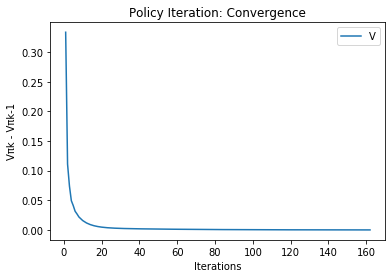

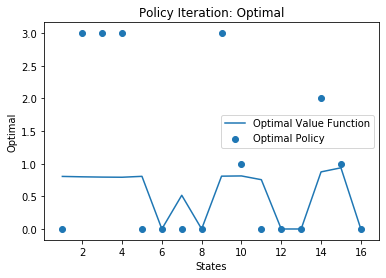

Optimal Value Function [0.8053584938360525, 0.7992681244250592, 0.7949436552292057, 0.7926997790327316, 0.806681177530167, 0.0, 0.5164196974486355, 0.0, 0.8092302585087601, 0.8128201748916286, 0.755261058367333, 0.0, 0.0, 0.8747487168291544, 0.9372307576332126, 0.0]

Optimal Policy [0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]


Optimal Q Function:  [0.8057993884007573, 0.7998567578301058, 0.7956371862289988, 0.7934477377648895, 0.8070899766249932, 0.0, 0.5167349045321795, 0.0, 0.8095772036435185, 0.8130800112350824, 0.7554902099911589, 0.0, 0.0, 0.8749332164513317, 0.9373264914874555, 0.0]

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (D

In [9]:
# Main
agent = Agent()
policy, V = agent.policyIteration()
env.reset()
state = 0
done = 0
plotV(agent)
optimalPolicy = computeOptimalPolicy(policy)
plotOptimalValueFunction(V, optimalPolicy)

print("Optimal Value Function", agent.V)
print()

print("Optimal Policy",optimalPolicy)
print()

optimalQ = [ 0 ]

for s in range (agent.numStates):
    for a in range (agent.numActions):
        foundQ = optimalQFunction(agent, policy, V, s, a)
        if( sum(optimalQ) < sum(foundQ) ):
            optimalQ = foundQ.copy()

print()
print("Optimal Q Function: ", optimalQ)


while not done:
    env.render()
    nstate, reward, done, e = env.env.step(policy[state])
    state = nstate

env.render()